# Classification Project

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

#import warnings
#warnings.filterwarnings("ignore")

from scipy import stats
import acquire
import prepare

## Acquire
    * Data acquired from Codeup database.
    * 24 columns and 7043 rows before cleaning.
    * Each row is a customer with the telco company.
    * Each column contains information about the customer and their services with telco.

## Prepare
    * Removed any duplicate rows from the dataset.
    * Dropped columns that had no useful information
    * Cleaned the total charges column and converted values to floats.
    * Filled null values in total charges with median value of column.
        * Median was used due to outliers skewing the mean.
    * Encoded categorical data.
    * Split the data into train, validate, split in a 50, 30, 20 split, stratified on churn.

In [2]:
# acquire the data
telco = acquire.get_telco_data()

In [3]:
# get information on the data
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   payment_type_id           7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [4]:
# easier viewing
telco.head().T

,0,1,2,3,4
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
payment_type_id,2,2,1,1,2
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [5]:
# clean the data
telco_clean = prepare.prep_telco(telco)

In [6]:
# make sure the data is cleaned as expected
telco_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 45 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   object 
 1   senior_citizen                         7043 non-null   int64  
 2   partner                                7043 non-null   object 
 3   dependents                             7043 non-null   object 
 4   tenure                                 7043 non-null   int64  
 5   phone_service                          7043 non-null   object 
 6   multiple_lines                         7043 non-null   object 
 7   online_security                        7043 non-null   object 
 8   online_backup                          7043 non-null   object 
 9   device_protection                      7043 non-null   object 
 10  tech_support                           7043 non-null   object 
 11  stre

In [7]:
# verifying no nulls are present
telco_clean.isnull().sum()

gender                                   0
senior_citizen                           0
partner                                  0
dependents                               0
tenure                                   0
phone_service                            0
multiple_lines                           0
online_security                          0
online_backup                            0
device_protection                        0
tech_support                             0
streaming_tv                             0
streaming_movies                         0
paperless_billing                        0
monthly_charges                          0
total_charges                            0
churn                                    0
payment_type                             0
contract_type                            0
internet_service_type                    0
gender_Male                              0
partner_Yes                              0
dependents_Yes                           0
phone_servi

In [8]:
# calculating mean to see if it is useful for removing nulls
telco_clean.total_charges.mean()

2281.9169281556156

In [9]:
# comparing mean to median
telco_clean.total_charges.median()

1397.475

In [10]:
# finding outlier that may skew mean
telco_clean.total_charges.max()

8684.8

In [11]:
# split the data
train, validate, test = prepare.split_data(telco_clean, 'churn')

In [12]:
# confirm the split
train.shape, validate.shape, test.shape

((3943, 45), (1691, 45), (1409, 45))

In [13]:
telco_clean.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes
multiple_lines,No,Yes,No,No,No
online_security,No,No,No,No,No
online_backup,Yes,No,No,Yes,No
device_protection,No,No,Yes,Yes,No


In [14]:
telco_clean.shape

(7043, 45)

## Explore

### Bivariate
    * Is contract type related to churn?
    * Is internet service type related to churn?
    * Are monthly charges related to churn?
    * Are total charges related to churn?
    
### Multivariate
    * Does the amount that month-to-month contract types pay relate to churn?
    * Does the amount that fiber optic customers pay relate to churn?

In [28]:
# create a crosstab between contract type and churn

contract_crosstab = pd.crosstab(index=train['contract_type'], columns=train['churn'])

<Axes: xlabel='contract_type'>

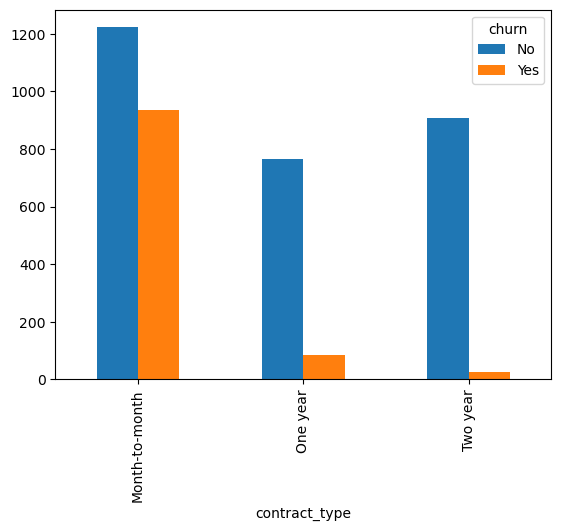

In [29]:
# visualize contract_type and churn

contract_crosstab.plot.bar()

In [30]:
# create a crosstab of service type and churn

internet_crosstab = pd.crosstab(index=train['internet_service_type'], columns=train['churn'])

<Axes: xlabel='internet_service_type'>

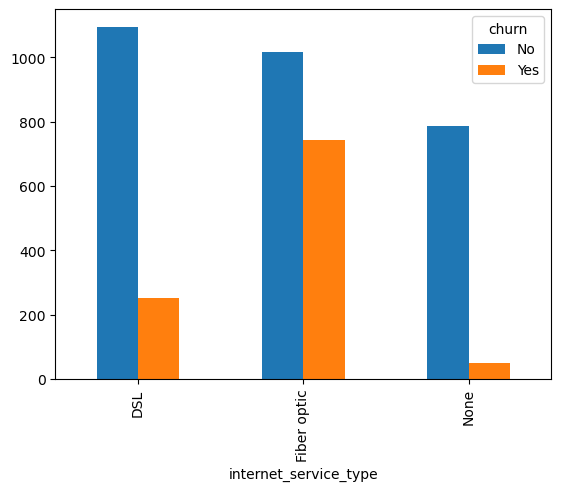

In [32]:
# visualize internet_service_type and churn

internet_crosstab.plot.bar()

<Axes: xlabel='churn', ylabel='monthly_charges'>

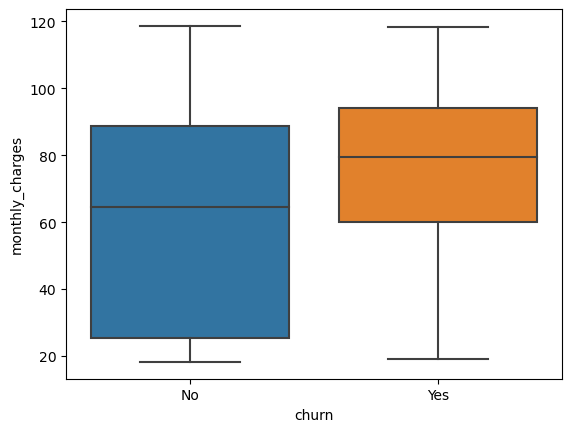

In [36]:
# visualize monthy_charges and churn
sns.boxplot(data=train, y='monthly_charges', x='churn')

<Axes: xlabel='churn', ylabel='total_charges'>

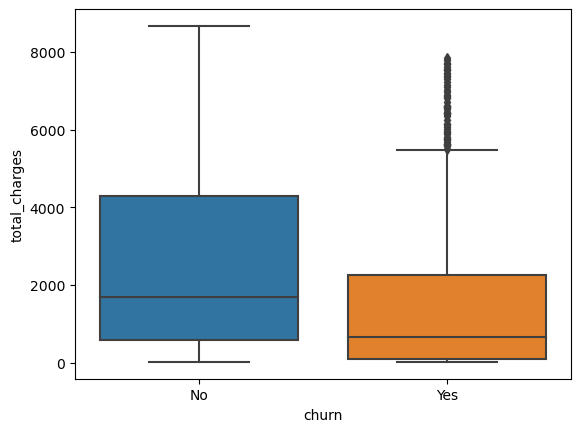

In [37]:
# visualize total_charges and churn

sns.boxplot(data=train, x='churn', y='total_charges')